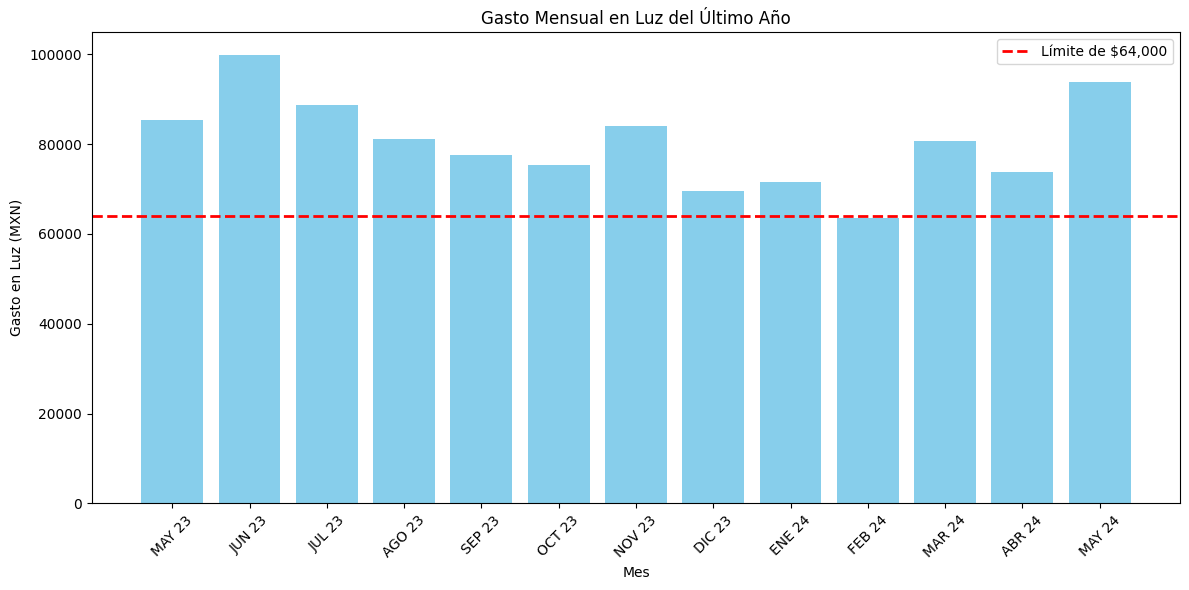

In [7]:
import matplotlib.pyplot as plt

# Datos del consumo histórico y costos asociados por mes del último año
meses = [
    "MAY 23", "JUN 23", "JUL 23", "AGO 23", "SEP 23", "OCT 23", 
     "NOV 23", "DIC 23", "ENE 24", "FEB 24", "MAR 24", "ABR 24", "MAY 24"
]
a = 767+21873
b = 17555+4593
# Consumo histórico en kWh
consumo_historico_kwh = [25604, 29993, 26666, 24374, 23310, a, 25246, 20865, 21509, 19073, 24195, b, 28185]

# Datos
total_a_pagar_actual = 93880.19
consumo_periodo_actual_kwh = 28185
cost_per_kwh = total_a_pagar_actual / consumo_periodo_actual_kwh

# Calcular el gasto mensual basado en el costo por kWh
gastos_historico_reales = [consumo * cost_per_kwh for consumo in consumo_historico_kwh]

# Crear el histograma con las mejoras solicitadas
plt.figure(figsize=(12, 6))
plt.bar(meses, gastos_historico_reales, color='skyblue')
plt.axhline(y=64000, color='red', linestyle='--', linewidth=2, label='Límite de $64,000')
plt.xlabel('Mes')
plt.ylabel('Gasto en Luz (MXN)')
plt.title('Gasto Mensual en Luz del Último Año')
plt.xticks(rotation=45)
plt.legend()
plt.gcf().set_facecolor('white')  # Fondo blanco
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [3]:
j = 0
for i in consumo_historico_kwh:
    j = j+i

    

AttributeError: 'list' object has no attribute 'sum'

In [11]:
import numpy as np

print(np.sum(consumo_historico_kwh)*cost_per_kwh)

1045249.4115139259


In [10]:
cost_per_kwh

3.330856483945361

In [12]:
len(consumo_historico_kwh)

13

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append(".")

# Importar funciones necesarias
from analisis_de_recibo import analisis_de_recibo
from calcular_articulos_requeridos import calcular_articulos_requeridos
from calcular_costo_proyecto import calcular_costo_proyecto
from actualizar_cotizacion_excel import actualizar_cotizacion_excel

# Datos del recibo extraídos manualmente
datos_recibo = {
    "nombre_cliente": "ESPUMADOS DEL BAJIO SA DE CV",
    "direccion_cliente": "CARR PANAM IRAP SIL KM 90.0, CERCA CTRO LOGISTICO BAJI, EX HACIENDA DE MARQUES, C.P. 36815, IRAPUATO, GTO",
    "tarifa": "GDMTH",
    "consumo_periodo_actual": 56363,  # Total kWh (sum of kWh base, kWh intermedia, kWh punta, KWh)
    "consumos_historicos": [13580, 10365, 14768, 15204, 16172, 8240, 8365, 12589, 12658, 10812, 12095, 11183],  # Historical consumption excluding current period
    "demanda_contratada": 297,
    "total_a_pagar": 48250.84
}



# Análisis del recibo
resultado_analisis = analisis_de_recibo(
    tarifa=datos_recibo["tarifa"],
    consumo_periodo_actual=datos_recibo["consumo_periodo_actual"],
    consumos_historicos=datos_recibo["consumos_historicos"],
    nombre_cliente=datos_recibo["nombre_cliente"],
    direccion_cliente=datos_recibo["direccion_cliente"],
    demanda_contratada=datos_recibo["demanda_contratada"]
)

# Calcular artículos requeridos
articulos_requeridos = calcular_articulos_requeridos(
    numero_paneles=resultado_analisis["numero_paneles"],
    tarifa=datos_recibo["tarifa"]
)

# Calcular costo del proyecto
costo_proyecto = calcular_costo_proyecto(
    articulos_requeridos=articulos_requeridos,
    analisis_resultado=resultado_analisis,
    path_precios_csv="precios.csv",
    tarifa=datos_recibo["tarifa"]
)

# Actualizar cotización en el archivo Excel
ruta_actualizada_excel = actualizar_cotizacion_excel(
    analisis_resultado=resultado_analisis,
    articulos_requeridos=articulos_requeridos,
    costo_total_proyecto=costo_proyecto[1],
    tarifa=datos_recibo["tarifa"],
    path_excel="cotizacion.xlsx",
    new_path_excel="cotizacion_actualizada.xlsx"
)

# Mostrar la ruta del archivo actualizado
print(f"Archivo Excel actualizado en: {ruta_actualizada_excel}")


tarifa:  GDMTH tamaño de consumos_historicos:  12
suma_consumos_historicos:  [16172, 15204, 14768, 13580, 12658, 12589, 12095, 11183, 10812, 10365, 8365]
promedio_mensual:  16179.5
numero_paneles (GDMTO, GDMTH):  181
Numero de paneles: 181 Promedio mensual: 16179.5 KWp: 105.885 KWh: 16184.522250000002 Tipo de periodo: Mensual
Nuevo folio basado en timestamp: GPT-1721091062
Archivo Excel actualizado en: cotizacion_actualizada.xlsx


In [5]:
costo_proyecto[1]

np.float64(1572810.266427972)

In [4]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 1.7 MB/s eta 0:00:00a 0:00:01
